<img src="img/Recurso-26.png" width="200">

## 01MIAR - Python 101, Data Types

![logo](img/python_logo.png)

*Luis Pilaguano*

# Examen del Tercer Parcial 
## Regresión lineal
Dado el archivo **movie_genre_classification_final.csv** se encuentra un base de datos con información de **50000 películas** que incluyen variables como: <br>
 * Título,
 * Año de estreno,
 * Duración,
 * Puntuación promedio,
 * Número de votos,
 * Presupuesto,
 * Ingresos en taquilla,
 * Número de premios obtenidos,
 * Entre otras caracterisiticas.
Como parate del análisis de predicción, se desea estudiar la relación entre el:<br>
* Presupuesto de una película
y sus caracteristicas cuantitativas, para estimar la **recaudación en taquilla (BoxOffice_USD)**. Para ello, se plantea entrenar un modelo de regresión lineal.<br>

# Objetivo 
Predecir el valor de la variable **BoxOffice_USD** a partir de variables numéricas independientes disponibles en el dataset, tales como:<br>
* Budget_USD (Presupuesto en dólares)
* Duration (Duración en minutos)
* Ratting (Calificiación Promedio"
* Votes (Número de votos)
* Num_Awards (Número de premios obtenidos)
* Critic_reviews (Números de reseñas de criticos)

El dataset fue extraido desder <a href="https://www.kaggle.com/datasets/therohithanand/movie-genre-classification">DataSet<a> <br>

## Entrega esperada
* Código bien estructurado y comentado
* Gráficos claros en los pasos 2, 4 y 5.
* Breve análisis escrito de lso los resultados obtenidos.



In [12]:
# Lectura de datos
import pandas as pd
# Cargar el archivo CSV
df = pd.read_csv("res/movie_genre_classification_final.csv")  
# Mostrar las primeras 5 filas
df.head(20)


,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330
5,Broken Truth 12,1985,D. Patel,116,4.4,268620,An emotional journey exploring complex charact...,English,France,110755639,200330529,Drama,Warner Bros,NC-17,Chris Evans,20,451
6,Crimson Sky 20,2004,R. Lee,117,5.3,38970,A light-hearted comedy that guarantees laughter.,Spanish,China,39979615,98944654,Comedy,Paramount Pictures,PG-13,Tom Hanks,16,770
7,Eternal Love 4,2016,T. Johnson,111,5.5,86559,A light-hearted comedy that guarantees laughter.,English,USA,148643591,746757001,Comedy,Warner Bros,PG-13,Tom Hanks,18,939
8,Broken Truth 7,1982,L. Zhang,129,4.3,288173,An emotional journey exploring complex charact...,French,USA,52574270,719946753,Drama,Netflix,G,Brad Pitt,15,261
9,Winds of Fate 16,1993,S. Chen,169,7.5,355096,An emotional journey exploring complex charact...,Hindi,USA,121633508,856605219,Drama,Warner Bros,R,Amitabh Bachchan,1,40


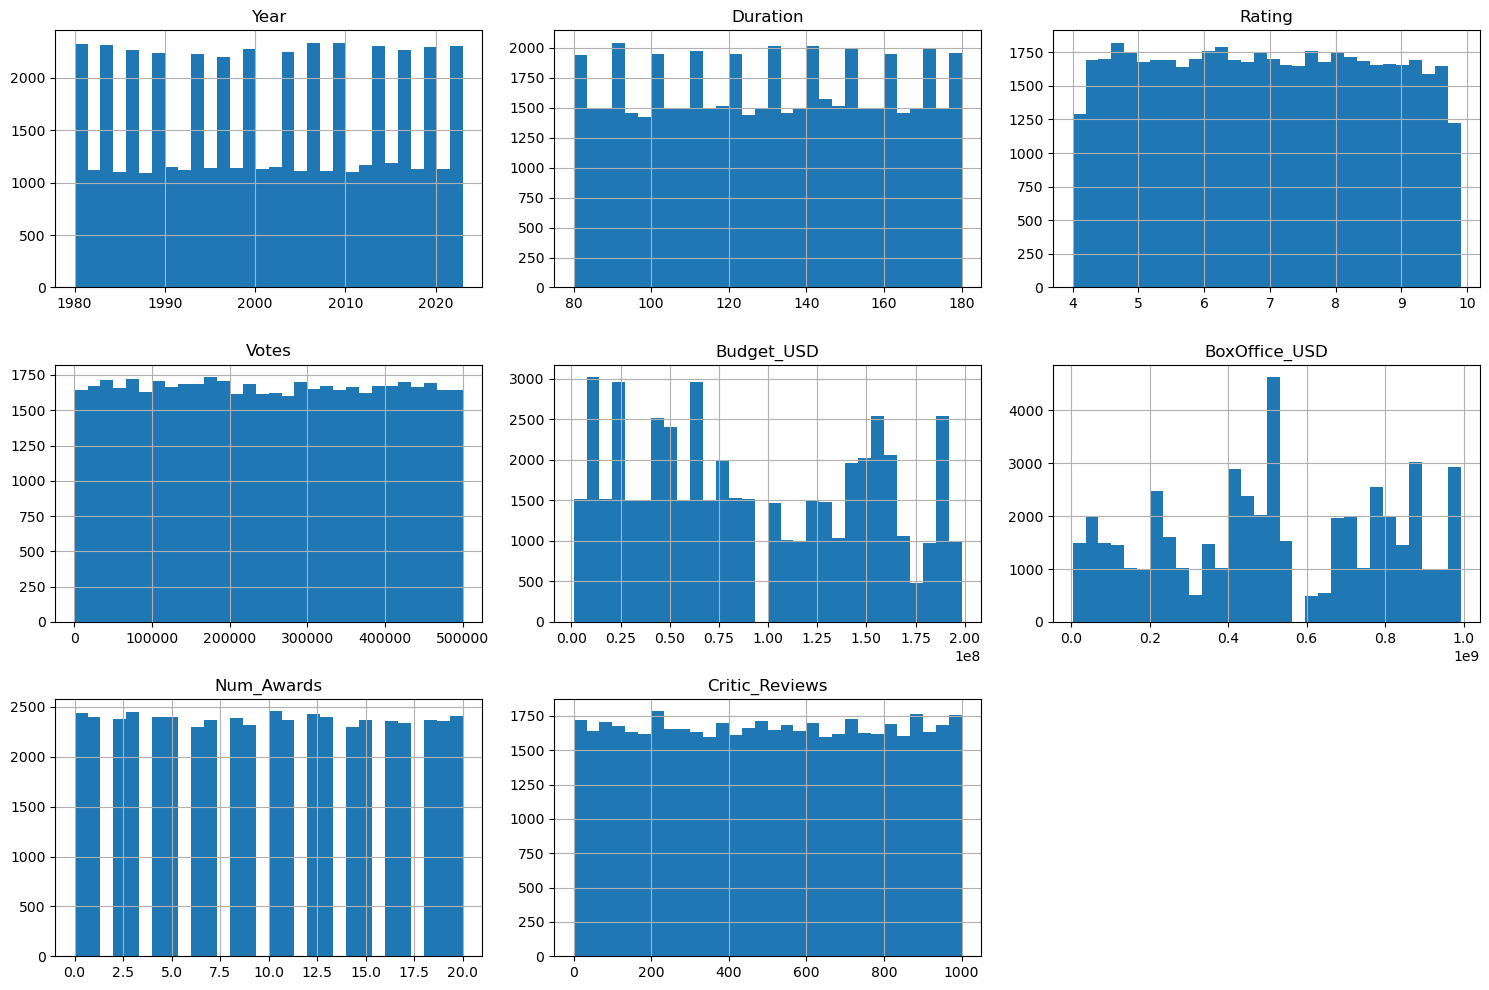

In [10]:
# Visualización del conjunto de datos
# Importo las librerías necesarias
import matplotlib.pyplot as plt  #   gráficos de forma manual
import seaborn as sns  #  gráficos  personalizados

#  Histograma de todas las columnas numéricas del DataFrame, en este caso son 8
df.hist(bins=30, figsize=(15, 10))  # Crea un histograma para cada columna numérica
plt.tight_layout()  # Ajusta automáticamente el espacio entre los gráficos
plt.show()  # Muestra todos los histogramas


In [22]:
# Modificación del conjutno de datos
# señecciono solo las columnas necesarias para el analisis en este caso son 7
columnas_relevantes = ['Budget_USD','Duration','Rating','Votes','Num_Awards','Critic_Reviews',
                       'BoxOffice_USD'   # esta ba ser mi variable a predecir
]

# Revisar las columnas del DataFrame para confirmar nombres exactos
print("--------------Estos son todas las columnas de mi archivo csv antes de la seleccion de columnas a utilizar------------------")
print(df.columns)
# creo un nuevo DataFrame solo con esas columnas
df_model = df[columnas_relevantes].copy()
# Mostrar el tamaño final
print(f"Tamaño del DataFrame tras limpiar: {df_model.shape}")
# Mostrar las primeras filas del nuevo DataFrame limpio
df_model.head()


--------------Estos son todas las columnas de mi archivo csv antes de la seleccion de columnas a utilizar------------------
Index(['Title', 'Year', 'Director', 'Duration', 'Rating', 'Votes',
       'Description', 'Language', 'Country', 'Budget_USD', 'BoxOffice_USD',
       'Genre', 'Production_Company', 'Content_Rating', 'Lead_Actor',
       'Num_Awards', 'Critic_Reviews'],
      dtype='object')
Tamaño del DataFrame tras limpiar: (50000, 7)


,Budget_USD,Duration,Rating,Votes,Num_Awards,Critic_Reviews,BoxOffice_USD
0,39979615,167,4.1,182425,8,229,179936008
1,116404774,166,4.1,449351,20,466,802121619
2,166261330,170,4.1,363328,16,539,225526871
3,28861315,170,9.9,62371,15,606,69813738
4,43890403,91,5.3,4600,6,330,375136716


In [23]:
#Construcción del modelo de regresión lineal

# Budget_USD (Presupuesto en dólares)
# Duration (Duración en minutos)
# Ratting (Calificiación Promedio"
# Votes (Número de votos)
# Num_Awards (Número de premios obtenidos)
# Critic_reviews (Números de reseñas de criticos)

from sklearn.linear_model import LinearRegression

# Definir variables independientes (X) y dependiente (y)
X = df_model.drop('BoxOffice_USD', axis=1)
y = df_model['BoxOffice_USD']

# Crear el modelo
modelo = LinearRegression()
# Entrenar el modelo con todos los datos
modelo.fit(X, y)
# Mostrar coeficiente (pendientes) y intercepto (constante)
print("Intercepto (b0):", modelo.intercept_)
print("Coeficientes (b1, b2, ...):")
for var, coef in zip(X.columns, modelo.coef_):
    print(f"  {var}: {coef}")


Intercepto (b0): 529537671.2698003
Coeficientes (b1, b2, ...):
  Budget_USD: 0.004876447897468708
  Duration: -71599.5862332624
  Rating: -996538.5469178511
  Votes: -8.357011648244224
  Num_Awards: 483656.8223504322
  Critic_Reviews: 2207.2402677343975


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

## POR TIEMPO Y CLASE DE SIGUIENTE HORA -----------------datas generados por la IA
# Variables independientes (X) y objetivo (y)
X = df_model.drop('BoxOffice_USD', axis=1)
y = df_model['BoxOffice_USD']

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = modelo.predict(X_test)

# Crear DataFrame con resultados reales y predicciones, formateando números con comas y sin decimales
resultados = pd.DataFrame({
    'Real': y_test.values,
    'Predicción': y_pred
})

# Formatear números para mejor lectura
resultados['Real'] = resultados['Real'].apply(lambda x: f"${x:,.0f}")
resultados['Predicción'] = resultados['Predicción'].apply(lambda x: f"${x:,.0f}")

# Mostrar las primeras 10 filas
print(resultados.head(10))


           Real    Predicción
0  $200,330,529  $517,533,775
1  $488,839,661  $520,799,513
2  $428,612,829  $514,359,671
3  $802,121,619  $510,530,996
4  $765,377,261  $524,760,739
5  $856,605,219  $515,216,590
6  $719,946,753  $513,235,545
7  $980,966,690  $515,138,661
8  $477,372,302  $515,448,445
9  $403,157,039  $510,798,174


In [ ]:
[GIT HUB]()